In [1]:
#import fiona
import matplotlib.pyplot as plt
import shapefile
import geopandas as gpd

# Import the Taiwan County Valley shapefile

In [2]:
shpFilePath = r"D:\GIS相關\ARC_GIS資料1\97分帶基本地圖\2.鄉鎮界97TM2\2_全臺鄉鎮界.shp"

In [3]:
Taiwan = gpd.read_file(shpFilePath)

In [8]:
Taiwan.head()

,townid,towncode,countyname,townname,geometry
0,10009006,1000912,雲林縣,崙背鄉,"POLYGON ((178889.414453 2635473.222454, 179103..."
1,10009007,1000904,雲林縣,西螺鎮,"POLYGON ((193691.351929 2635275.884228, 193717..."
2,68000003,6800012,桃園市,觀音區,"POLYGON ((265669.951775 2774800.065621, 265701..."
3,68000007,6800011,桃園市,新屋區,"POLYGON ((252300.65618 2766562.047599, 252304...."
4,10009020,1000918,雲林縣,四湖鄉,"POLYGON ((167011.696789 2622024.614267, 167021..."


In [21]:
Taiwan['num'] = Taiwan['countyname']
Taiwan.head()

,townid,towncode,countyname,townname,geometry,num
0,10009006,1000912,雲林縣,崙背鄉,"POLYGON ((178889.414453 2635473.222454, 179103...",雲林縣
1,10009007,1000904,雲林縣,西螺鎮,"POLYGON ((193691.351929 2635275.884228, 193717...",雲林縣
2,68000003,6800012,桃園市,觀音區,"POLYGON ((265669.951775 2774800.065621, 265701...",桃園市
3,68000007,6800011,桃園市,新屋區,"POLYGON ((252300.65618 2766562.047599, 252304....",桃園市
4,10009020,1000918,雲林縣,四湖鄉,"POLYGON ((167011.696789 2622024.614267, 167021...",雲林縣


In [26]:
Taiwan_test = Taiwan.groupby('num').min()  

In [7]:
#Taiwan_test.drop(Taiwan_test.index[[4, 13, 16, 22]], inplace=True)
#del Taiwan_test['townid']
#del Taiwan_test['towncode']
#del Taiwan_test['townname']
#Taiwan_test

In [12]:
# Test

Taiwan_Touyung = Taiwan[Taiwan['countyname'] == "桃園市"]
Taiwan_Touyung.head()

,townid,towncode,countyname,townname,geometry
2,68000003,6800012,桃園市,觀音區,"POLYGON ((265669.951775 2774800.065621, 265701..."
3,68000007,6800011,桃園市,新屋區,"POLYGON ((252300.65618 2766562.047599, 252304...."
12,68000010,6800004,桃園市,楊梅區,"POLYGON ((266738.831946 2761106.846082, 266762..."
13,68000006,6800002,桃園市,中壢區,"POLYGON ((266371.618201 2768724.545001, 266478..."
14,68000008,6800008,桃園市,八德區,"POLYGON ((282675.563969 2762628.293993, 282695..."


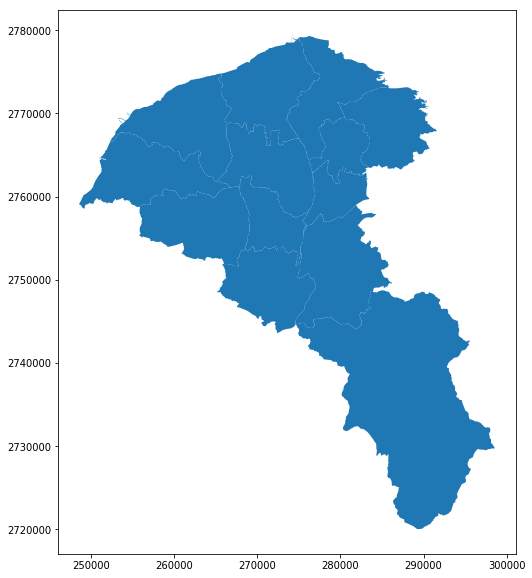

In [14]:
# Test the Touyuan plt

Taiwan_Touyung.plot(figsize=(10,10))

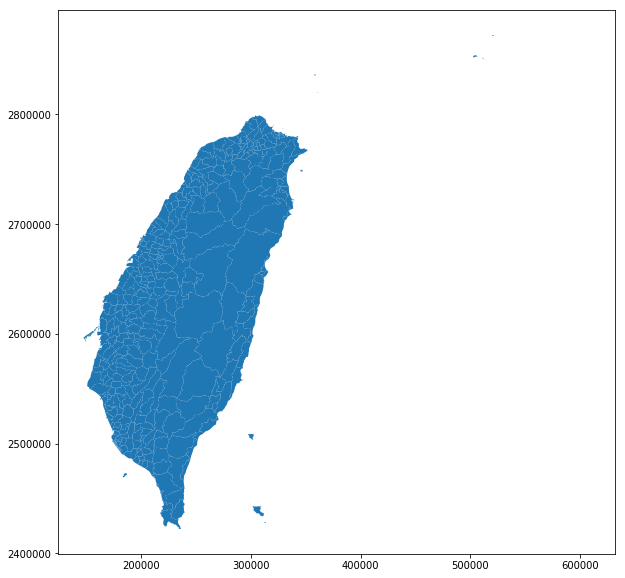

In [15]:
Taiwan.plot(figsize=(10,10))

In [16]:
import numpy as np
from ipywidgets import interact
from ipywidgets import interact_manual
import pandas as pd

In [27]:
# The example for Taiwan shapefile interact


name = []

for i in range(0, len(Taiwan_test)):
#    print(Taiwan_test['countyname'][i])
    name.append(Taiwan_test['countyname'][i])
    
def f(x):
    print(x)
#    print(Taiwan[Taiwan['countyname'] == x])
#    df = Taiwan[Taiwan['countyname'] == x]
    Taiwan[Taiwan['countyname'] == x].plot(figsize=(10,10), color='purple')
interact_manual(f, x=name)

interactive(children=(Dropdown(description='x', options=('南投縣', '台中市', '台北市', '台南市', '台東縣', '嘉義市', '嘉義縣', '基隆市…

<function __main__.f(x)>

# Import the RoadKill Data

In [28]:
from shapely.geometry import Point
from geopandas import GeoDataFrame
import shapely.geometry
import csv
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Create the Coordinate

In [34]:
RD_Kill = pd.read_csv('RoadKill.csv')

# reanme
#RD_Kill = RD_Kill.rename(columns={'coord': 'geometry'})

# combine the lon lat to geometry
RD_Kill['geometry']=RD_Kill[['lon','lat']].apply(lambda t : shapely.geometry.Point(*t),axis=1)

# GeoDataFrame 
RD_Kill = gpd.GeoDataFrame(RD_Kill)
gdf = GeoDataFrame(RD_Kill, crs={'init':'epsg:4326'}, geometry=list(RD_Kill['geometry']))

In [35]:
gdf.head(3)

,Unnamed: 0,cause_of_death,collected_date,collected_place_admin,collected_place_coord,count,identifier,image,species,lon,lat,County,geometry
0,0,路殺,2013/10/28,台中市霧峰區,"24.06078, 120.741756, 143",1,259,https://roadkill.tw/sites/roadkill/files/style...,Lycodon ruhstrati ruhstrati (白梅花蛇),120.741756,24.060780,台中市,POINT (120.741756 24.06078)
1,1,路殺,2013/11/12,台南市六甲區,"23.244977, 120.337301, 22",1,260,https://roadkill.tw/sites/roadkill/files/style...,Mesophoyx intermedia intermedia (中白鷺),120.337301,23.244977,台南市,POINT (120.337301 23.244977)
2,2,路殺,2013/11/13,台南市六甲區,"23.247067, 120.338328, 28",1,261,https://roadkill.tw/sites/roadkill/files/style...,Eutropis longicaudata (長尾真稜蜥),120.338328,23.247067,台南市,POINT (120.338328 23.247067)


# Transfer the Coordinate to TWD97 

In [65]:
# !pip install twd97

In [66]:
import twd97

In [67]:
# twd97.towgs84(248170.787, 2652129.936)

In [68]:
gdf['geometry_Twd97']=gdf[['lat','lon']].apply(lambda t : shapely.geometry.Point(twd97.fromwgs84(*t)),axis=1)

In [69]:
gdf.head()

,Unnamed: 0,cause_of_death,collected_date,collected_place_admin,collected_place_coord,count,identifier,image,species,lon,lat,County,geometry,geometry_Twd97
0,0,路殺,2013/10/28,台中市霧峰區,"24.06078, 120.741756, 143",1,259,https://roadkill.tw/sites/roadkill/files/style...,Lycodon ruhstrati ruhstrati (白梅花蛇),120.741756,24.060780,台中市,POINT (120.741756 24.06078),POINT (223738.4344625803 2661778.492696289)
1,1,路殺,2013/11/12,台南市六甲區,"23.244977, 120.337301, 22",1,260,https://roadkill.tw/sites/roadkill/files/style...,Mesophoyx intermedia intermedia (中白鷺),120.337301,23.244977,台南市,POINT (120.337301 23.244977),POINT (182192.4943489433 2571565.347034114)
2,2,路殺,2013/11/13,台南市六甲區,"23.247067, 120.338328, 28",1,261,https://roadkill.tw/sites/roadkill/files/style...,Eutropis longicaudata (長尾真稜蜥),120.338328,23.247067,台南市,POINT (120.338328 23.247067),POINT (182298.6193707707 2571796.317401174)
3,3,路殺,2011/08/23,高雄市橋頭區,"22.749034, 120.296924, 6",1,262,https://roadkill.tw/sites/roadkill/files/style...,Hemidactylus bowringii (無疣蝎虎),120.296924,22.749034,高雄市,POINT (120.296924 22.749034),POINT (177798.4165757039 2516664.685478029)
4,4,路殺,2013/07/02,雲林縣古坑鄉,"23.636502, 120.531874, 64",1,263,http://loc.roadkill.tw/sites/roadkill/files/st...,Pipistrellus abramus (東亞家蝠),120.531874,23.636502,雲林縣,POINT (120.531874 23.636502),POINT (202240.7145518436 2614845.938162101)


In [70]:
# 取出前三個字>>縣市

for j in range(0,len(gdf)):
    gdf['County'][j] = gdf['collected_place_admin'][j][0:3]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [71]:
gdf.head()

,Unnamed: 0,cause_of_death,collected_date,collected_place_admin,collected_place_coord,count,identifier,image,species,lon,lat,County,geometry,geometry_Twd97
0,0,路殺,2013/10/28,台中市霧峰區,"24.06078, 120.741756, 143",1,259,https://roadkill.tw/sites/roadkill/files/style...,Lycodon ruhstrati ruhstrati (白梅花蛇),120.741756,24.060780,台中市,POINT (120.741756 24.06078),POINT (223738.4344625803 2661778.492696289)
1,1,路殺,2013/11/12,台南市六甲區,"23.244977, 120.337301, 22",1,260,https://roadkill.tw/sites/roadkill/files/style...,Mesophoyx intermedia intermedia (中白鷺),120.337301,23.244977,台南市,POINT (120.337301 23.244977),POINT (182192.4943489433 2571565.347034114)
2,2,路殺,2013/11/13,台南市六甲區,"23.247067, 120.338328, 28",1,261,https://roadkill.tw/sites/roadkill/files/style...,Eutropis longicaudata (長尾真稜蜥),120.338328,23.247067,台南市,POINT (120.338328 23.247067),POINT (182298.6193707707 2571796.317401174)
3,3,路殺,2011/08/23,高雄市橋頭區,"22.749034, 120.296924, 6",1,262,https://roadkill.tw/sites/roadkill/files/style...,Hemidactylus bowringii (無疣蝎虎),120.296924,22.749034,高雄市,POINT (120.296924 22.749034),POINT (177798.4165757039 2516664.685478029)
4,4,路殺,2013/07/02,雲林縣古坑鄉,"23.636502, 120.531874, 64",1,263,http://loc.roadkill.tw/sites/roadkill/files/st...,Pipistrellus abramus (東亞家蝠),120.531874,23.636502,雲林縣,POINT (120.531874 23.636502),POINT (202240.7145518436 2614845.938162101)


In [72]:
# GeoDataFrame
gdf = GeoDataFrame(gdf, geometry=list(gdf['geometry_Twd97']))

#  Test the RoadKill Point

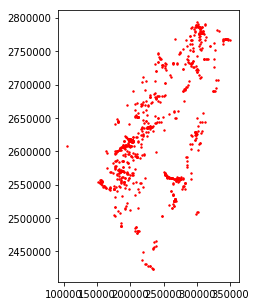

In [75]:
gdf.plot(figsize=(5,5), color='red', markersize=2 )

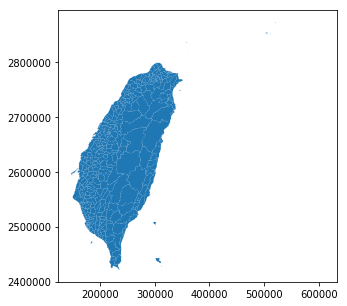

In [77]:
Taiwan.plot(figsize=(5,5))

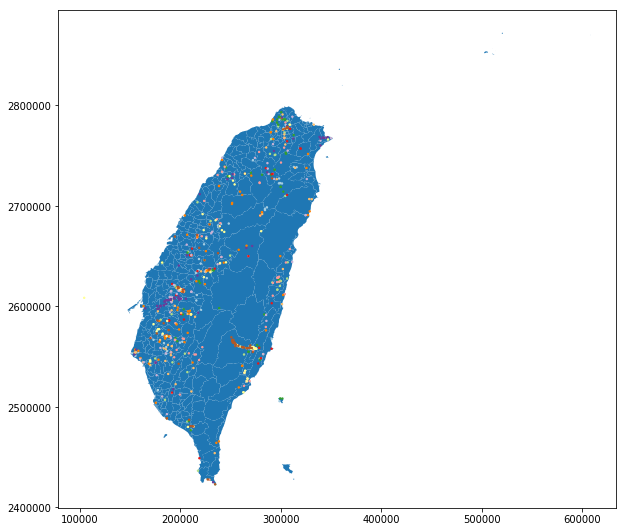

In [78]:
gdf.plot(ax=Taiwan.plot(figsize=(10,10)),     figsize=(10,10), cmap='Paired', markersize=2)

In [79]:
# wrong
#gdf['geometry_Twd97'].astype(float)
#gdf['geometry_Twd97'] = twd97.fromwgs84(gdf['lat'], gdf['lon'], pkm=True)
#RD_Kill['geometry_97']=RD_Kill[['lon','lat']].apply(lambda t : twd97.fromwgs84(lat,lon,  pkm=True))

# Interact

In [80]:
My_name = []

for i in range(0, len(Taiwan_test)):
#    print(Taiwan_test['countyname'][i])
    My_name.append(Taiwan_test['countyname'][i])
    
def f(x):
    print(x)
#    print(Taiwan[Taiwan['countyname'] == x])
    df = Taiwan[Taiwan['countyname'] == x]
    gdf[gdf['County']==x].plot(ax=Taiwan[Taiwan['countyname']==x].plot(figsize=(10,10), color='purple'),figsize=(10,10), color='red')
#    Taiwan[Taiwan['countyname'] == x].plot(ax=gdf[gdf['County']==x].plot(figsize=(10,10), color='red'),figsize=(10,10), color='purple')
interact_manual(f, x=name)

interactive(children=(Dropdown(description='x', options=('南投縣', '台中市', '台北市', '台南市', '台東縣', '嘉義市', '嘉義縣', '基隆市…

<function __main__.f(x)>

In [81]:
gdf['County'].unique()

array(['台中市', '台南市', '高雄市', '雲林縣', '南投縣', '台北市', '台東縣', '新北市', '彰化縣',
       '苗栗縣', '嘉義縣', '屏東縣', '新竹縣', '宜蘭縣', '基隆市', '花蓮縣', '桃園市', '嘉義市',
       '新竹市', '澎湖縣'], dtype=object)

In [84]:
items = ['我要全台']+sorted(gdf['County'].unique().tolist())

#for i in range(0, len(Taiwan_test)):
#    print(Taiwan_test['countyname'][i])
#    items.append(Taiwan_test['countyname'][i])
    
def f(x):
    if x == '我要全台': 
        gdf.plot(ax=Taiwan.plot(figsize=(10,10), color='purple'),figsize=(10,10),markersize=50,cmap='Paired') 
    else:
        
#        print(x)
#    print(Taiwan[Taiwan['countyname'] == x])
#        df = Taiwan[Taiwan['countyname'] == x]
        gdf[gdf['County']==x].plot(ax=Taiwan[Taiwan['countyname']==x].plot(figsize=(10,10),
                                                                           color='purple'),figsize=(10,10), markersize=50,cmap='Paired')
#    Taiwan[Taiwan['countyname'] == x].plot(ax=gdf[gdf['County']==x].plot(figsize=(10,10), color='red'),figsize=(10,10), color='purple')
interact_manual(f, x=items)

interactive(children=(Dropdown(description='x', options=('我要全台', '南投縣', '台中市', '台北市', '台南市', '台東縣', '嘉義市', '嘉義…

<function __main__.f(x)>